In [1]:

import _init_
from constants import *
from set_path import *
from config import *
from functions import *

In [2]:
folder = 'DiodeBC/ExtDir+SimpleDiode/'
data_path = os.path.join(scratch, 'sims/', folder)
output_folder = os.path.join(fig_path, folder, 'TRhoHisto/')
os.chdir(output_folder)
list_file = glob.glob("histo_*.h5")
hf = h5py.File(list_file[0] ,'r')
dens_bins = np.array(hf.get("DensBins"))
temp_bins = np.array(hf.get("TempBins"))
timestep_zsol = np.zeros(len(list_file))
mass_zsol = np.zeros((len(list_file), dens_bins.shape[0]-1, temp_bins.shape[0]-1))

for i in range(len(list_file)):
    hf = h5py.File(list_file[i] ,'r')
    timestep_zsol[i] = np.array(hf.get("Timestep")) 
    mass_zsol[i] = np.array(hf.get("TotalMass"))

In [3]:
folder = 'MetDepCooling/'
data_path = os.path.join(scratch, 'sims/', folder)
output_folder = os.path.join(fig_path, folder, 'TRhoHisto/')
os.chdir(output_folder)
list_file = glob.glob("histo_*.h5")
hf = h5py.File(list_file[0] ,'r')
dens_bins = np.array(hf.get("DensBins"))
temp_bins = np.array(hf.get("TempBins"))

timestep_02zsol = np.zeros(len(list_file))
mass_02zsol = np.zeros((len(list_file), dens_bins.shape[0]-1, temp_bins.shape[0]-1))

for i in range(len(list_file)):
    hf = h5py.File(list_file[i] ,'r')
    timestep_02zsol[i] = np.array(hf.get("Timestep")) 
    mass_02zsol[i] = np.array(hf.get("TotalMass"))

/jobfs/110249985.gadi-pbs/ipykernel_3851713/3976527469.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[0].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_zsol[67])/Msun,\
/jobfs/110249985.gadi-pbs/ipykernel_3851713/3976527469.py:19: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax[1].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_02zsol[33])/Msun,\


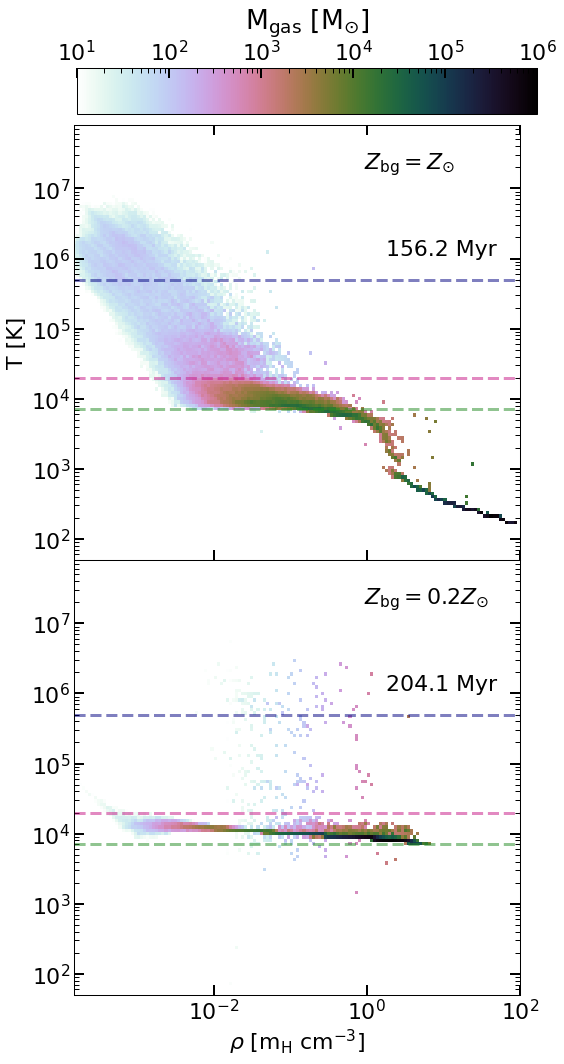

In [4]:
fig, ax = plt.subplots(2, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,16))

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.8
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5

plot = ax[0].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_zsol[67])/Msun,\
                     norm=mcolors.LogNorm(vmin=10., vmax=1.e6),cmap='cubehelix_r')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(10., 1.e2, 1.e3, 1.e4, 1.e5, 1.e6))
cax.xaxis.set_ticks_position('top')
cax.set_title(r'M$_{\rm gas}$ [M$_{\odot}$]')


plot = ax[1].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_02zsol[33])/Msun,\
                     norm=mcolors.LogNorm(vmin=10., vmax=1.e6),cmap='cubehelix_r')


plt.setp(ax, 'yscale', ('log'))
plt.setp(ax, 'xscale', ('log'))
plt.setp(ax, 'xlim',(1.e-4, 1.e2))
plt.setp(ax, 'xlim',(1.5e-4, 1.e2))
plt.setp(ax, 'ylim',(5.e1, 8.e7))

ax[0].set_ylabel(r'T [K]')
plt.setp(ax, 'xlabel', (r'$\rho$ [m$_{\rm H}$ cm$^{-3}$]'))

ax[0].tick_params(axis='y', which='both', left=True, right=True)
ax[0].tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)

ax[0].text(0.65, 0.9, r'$Z_{\rm bg}=Z_{\odot}$', transform=ax[0].transAxes)
ax[1].text(0.65, 0.9, r'$Z_{\rm bg}=0.2 Z_{\odot}$', transform=ax[1].transAxes)
ax[0].text(0.7, 0.7, '%.1f'%(timestep_zsol[67]) + ' Myr', transform=ax[0].transAxes)
ax[1].text(0.7, 0.7, '%.1f'%(timestep_02zsol[33]) + ' Myr', transform=ax[1].transAxes)

ls = ['--', '-.', (0, (3, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)) ]
color = ['forestgreen', 'mediumvioletred', 'navy',  'indianred', ]
tvals = [ 7105, 2.e4, 5.e5]
kk=0
for i in range(2):
    kk=0
    for tt in tvals:
        ax[i].axhline(tt, ls='--', color=color[kk], lw=3.0, alpha=0.5)
        kk+=1


# ax[-1].tick_params(axis='y', which='both', left=True, right=True,labelleft=False, labelright=True)
ax[-1].tick_params(axis='y', which='both', left=True, right=True)
# plt.savefig(fig_home + 'temp-dens-mgas.jpeg', bbox_inches='tight', dpi=160)

/jobfs/110249985.gadi-pbs/ipykernel_3851713/3100397136.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax.pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_zsol[67])/Msun,\


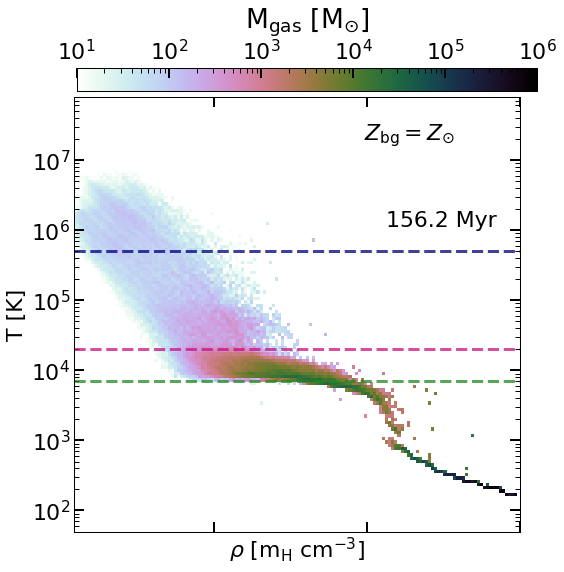

In [5]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.8
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5

plot = ax.pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_zsol[67])/Msun,\
                     norm=mcolors.LogNorm(vmin=10., vmax=1.e6),cmap='cubehelix_r')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(10., 1.e2, 1.e3, 1.e4, 1.e5, 1.e6))
cax.xaxis.set_ticks_position('top')
cax.set_title(r'M$_{\rm gas}$ [M$_{\odot}$]')


# plot = ax[1].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_02zsol[33])/Msun,\
#                      norm=mcolors.LogNorm(vmin=10., vmax=1.e6),cmap='cubehelix_r')


plt.setp(ax, 'yscale', ('log'))
plt.setp(ax, 'xscale', ('log'))
plt.setp(ax, 'xlim',(1.e-4, 1.e2))
plt.setp(ax, 'xlim',(1.5e-4, 1.e2))
plt.setp(ax, 'ylim',(5.e1, 8.e7))

ax.set_ylabel(r'T [K]')
plt.setp(ax, 'xlabel', (r'$\rho$ [m$_{\rm H}$ cm$^{-3}$]'))

ax.tick_params(axis='y', which='both', left=True, right=True)
ax.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)

ax.text(0.65, 0.9, r'$Z_{\rm bg}=Z_{\odot}$', transform=ax.transAxes)
ax.text(0.7, 0.7, '%.1f'%(timestep_zsol[67]) + ' Myr', transform=ax.transAxes)


ls = ['--', '-.', (0, (3, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)) ]
color = ['forestgreen', 'mediumvioletred', 'navy',  'indianred', ]
tvals = [ 7105, 2.e4, 5.e5]
kk=0
for i in range(2):
    kk=0
    for tt in tvals:
        ax.axhline(tt, ls='--', color=color[kk], lw=3.0, alpha=0.5)
        kk+=1


# ax[-1].tick_params(axis='y', which='both', left=True, right=True,labelleft=False, labelright=True)
ax.tick_params(axis='y', which='both', left=True, right=True)
# plt.savefig(fig_home + 'temp-dens-mgas.jpeg', bbox_inches='tight', dpi=160)

/jobfs/110249985.gadi-pbs/ipykernel_3851713/416192437.py:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plot = ax.pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_02zsol[33])/Msun,\


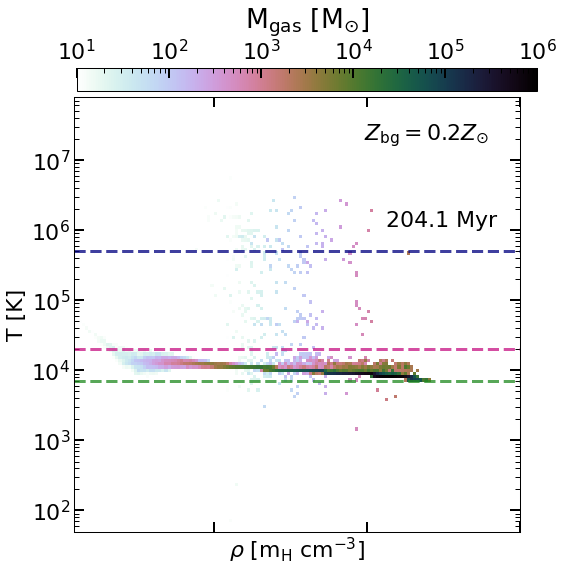

In [6]:
fig, ax = plt.subplots(1, 1, gridspec_kw = {'wspace':0.00, 'hspace':0.00},figsize=(8,8))

cbarx = 0.13
cbheight = 0.04
cbary = 0.89
cblen = 0.8
dx1 = 0.13
cbtitlex = 0.1
cbtitley = 16.5

plot = ax.pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_02zsol[33])/Msun,\
                     norm=mcolors.LogNorm(vmin=10., vmax=1.e6),cmap='cubehelix_r')
cax = fig.add_axes([cbarx, cbary, cblen, cbheight])
fig.colorbar(plot, cax=cax, orientation='horizontal', ticks=(10., 1.e2, 1.e3, 1.e4, 1.e5, 1.e6))
cax.xaxis.set_ticks_position('top')
cax.set_title(r'M$_{\rm gas}$ [M$_{\odot}$]')


# plot = ax[1].pcolormesh(dens_bins[:-1], temp_bins[:-1] , np.transpose(mass_02zsol[33])/Msun,\
#                      norm=mcolors.LogNorm(vmin=10., vmax=1.e6),cmap='cubehelix_r')


plt.setp(ax, 'yscale', ('log'))
plt.setp(ax, 'xscale', ('log'))
plt.setp(ax, 'xlim',(1.e-4, 1.e2))
plt.setp(ax, 'xlim',(1.5e-4, 1.e2))
plt.setp(ax, 'ylim',(5.e1, 8.e7))

ax.set_ylabel(r'T [K]')
plt.setp(ax, 'xlabel', (r'$\rho$ [m$_{\rm H}$ cm$^{-3}$]'))

ax.tick_params(axis='y', which='both', left=True, right=True)
ax.tick_params(axis='x', which='both', bottom=True, top=True, labelbottom=False)

ax.text(0.65, 0.9, r'$Z_{\rm bg}=0.2Z_{\odot}$', transform=ax.transAxes)
ax.text(0.7, 0.7, '%.1f'%(timestep_02zsol[33]) + ' Myr', transform=ax.transAxes)


ls = ['--', '-.', (0, (3, 1, 1, 1)), (0, (3, 1, 1, 1, 1, 1)) ]
color = ['forestgreen', 'mediumvioletred', 'navy',  'indianred', ]
tvals = [ 7105, 2.e4, 5.e5]
kk=0
for i in range(2):
    kk=0
    for tt in tvals:
        ax.axhline(tt, ls='--', color=color[kk], lw=3.0, alpha=0.5)
        kk+=1


# ax[-1].tick_params(axis='y', which='both', left=True, right=True,labelleft=False, labelright=True)
ax.tick_params(axis='y', which='both', left=True, right=True)
# plt.savefig(fig_home + 'temp-dens-mgas.jpeg', bbox_inches='tight', dpi=160)